In [1]:
import torch
from torch import nn

In [2]:
# 载入数据
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [3]:
gpu = False
if torch.cuda.is_available():
    device = torch.device("cuda")
    gpu = True
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU is not available")

GPU is available


In [4]:
input_size = 64

In [8]:
# 改造数据
import cv2 as cv
import os
base_path = 'data/raw'
sub_dirs = os.listdir(base_path)
sub_dirs = [os.path.join(base_path, sub) for sub in sub_dirs]
img_csv = []
for i, dir in enumerate(sub_dirs):
    for m, file_name in enumerate(os.listdir(dir)):
        if file_name.endswith('.png'):
            img = cv.imread(os.path.join(dir, file_name))
            img = cv.resize(img, (input_size, input_size))
            # 缩放图片并旋转36次
            for angle in range(36):
                M = cv.getRotationMatrix2D((input_size / 2, input_size / 2), angle * 10, 1)
                rotated = cv.warpAffine(img, M, (input_size, input_size))
                output_path = f"data/train/{i}_{m}_{angle}.jpg"
                cv.imwrite(output_path, rotated)
                img_csv.append({'img_path': output_path, 'label': i})            

ModuleNotFoundError: No module named 'cv2'

In [10]:
print(img_csv)

[{'img_path': 'data/train/0_0_0.jpg', 'label': 0}, {'img_path': 'data/train/0_0_1.jpg', 'label': 0}, {'img_path': 'data/train/0_0_2.jpg', 'label': 0}, {'img_path': 'data/train/0_0_3.jpg', 'label': 0}, {'img_path': 'data/train/0_0_4.jpg', 'label': 0}, {'img_path': 'data/train/0_0_5.jpg', 'label': 0}, {'img_path': 'data/train/0_0_6.jpg', 'label': 0}, {'img_path': 'data/train/0_0_7.jpg', 'label': 0}, {'img_path': 'data/train/0_0_8.jpg', 'label': 0}, {'img_path': 'data/train/0_0_9.jpg', 'label': 0}, {'img_path': 'data/train/0_0_10.jpg', 'label': 0}, {'img_path': 'data/train/0_0_11.jpg', 'label': 0}, {'img_path': 'data/train/0_0_12.jpg', 'label': 0}, {'img_path': 'data/train/0_0_13.jpg', 'label': 0}, {'img_path': 'data/train/0_0_14.jpg', 'label': 0}, {'img_path': 'data/train/0_0_15.jpg', 'label': 0}, {'img_path': 'data/train/0_0_16.jpg', 'label': 0}, {'img_path': 'data/train/0_0_17.jpg', 'label': 0}, {'img_path': 'data/train/0_0_18.jpg', 'label': 0}, {'img_path': 'data/train/0_0_19.jpg', 'l

In [11]:
import csv
with open('data/train.csv', 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['img_path', 'label'])
    writer.writeheader()
    for row in img_csv:
        writer.writerow(row)

In [17]:
import pandas as pd
class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, **kwargs):
        super(CustomImageDataset, self).__init__(**kwargs)
        data = pd.read_csv(annotation_file)
        self.img_path_list = data['img_path'].tolist()
        self.labels = data['label'].tolist()

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = read_image(self.img_path_list[idx])
        label = self.labels[idx]
        return image / 255, label

In [18]:
training_data = CustomImageDataset("data/train.csv")
training_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)

864

In [19]:
for batch in training_dataloader:
    print(batch[0][0])
    break

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0039],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.

In [20]:
class LeNet(nn.Module):
    def __init__(self, **kwargs):
        super(LeNet, self).__init__(**kwargs)
        self.c1 = nn.Conv2d(3, 6, kernel_size=5) # (6, 60, 60)
        self.a1 = nn.Sigmoid()
        self.p1 = nn.MaxPool2d(kernel_size=2, stride=2) # (6, 30, 30)
        self.c2 = nn.Conv2d(6, 16, kernel_size=5) # (16, 26, 26)
        self.a2 = nn.Sigmoid()
        self.p2 = nn.MaxPool2d(kernel_size=2, stride=2) # (16, 13, 13)
        self.flatten = nn.Flatten()
        self.f1 = nn.Linear(16 * 13 * 13, 240)
        self.a3 = nn.Sigmoid()
        self.f2 = nn.Linear(240, 84)
        self.a4 = nn.Sigmoid()
        self.f3 = nn.Linear(84, 3)
    
    def forward(self, X):
        X = self.c1(X)
        X = self.a1(X)
        X = self.p1(X)
        X = self.c2(X)
        X = self.a2(X)
        X = self.p2(X)
        X = self.flatten(X)
        X = self.f1(X)
        X = self.a3(X)
        X = self.f2(X)
        X = self.a4(X)
        X = self.f3(X)
        return X

In [85]:
image = torch.randn(1, 3, 64, 64)

In [23]:
net = LeNet()

In [87]:
lr = 1e-4
max_epoch = 100

In [90]:
from matplotlib import pyplot as plt
import numpy as np
def train(net, train_iter, num_epochs, lr, device):
    def xavier_init_weights(m):
        if type(m) == nn.Linear:
            nn.init.xavier_uniform_(m.weight)
        if type(m) == nn.GRU:
            for param in m._flat_weights_names:
                if "weight" in param:
                    nn.init.xavier_uniform_(m._parameters[param])
    net.apply(xavier_init_weights)
    net.to(device)
    net.train()
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    
    loss_history = []
    for epoch in range(num_epochs):
        loss_value = 0
        for i, (X, y) in enumerate(train_iter):
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.sum().backward()
            optimizer.step()
            loss_value += l.item()
        loss_history.append(loss_value)
    plt.plot(np.arange(num_epochs), loss_history)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()

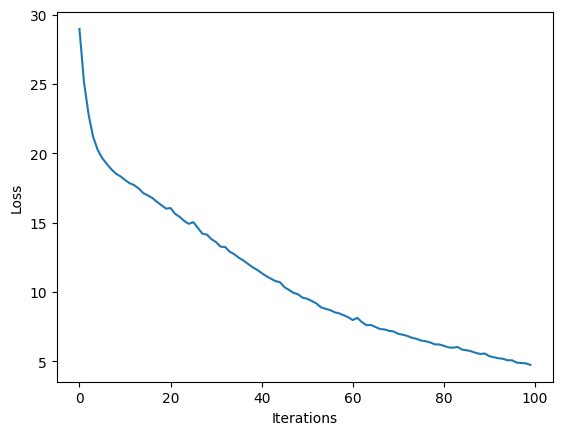

In [91]:
train(net, training_dataloader, max_epoch, lr, device)

In [35]:
def predict(net, img):
    net.eval()
    return torch.argmax(net(img),  dim=1)

In [27]:
net.load_state_dict(torch.load("model/LeNet_serie_100.pth"))
net.to(device)

C:\Users\Yikun\AppData\Local\Temp\ipykernel_4440\3329330305.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load("model/LeNet_serie_100.pth"))


LeNet(
  (c1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (a1): Sigmoid()
  (p1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (a2): Sigmoid()
  (p2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (f1): Linear(in_features=2704, out_features=240, bias=True)
  (a3): Sigmoid()
  (f2): Linear(in_features=240, out_features=84, bias=True)
  (a4): Sigmoid()
  (f3): Linear(in_features=84, out_features=3, bias=True)
)

In [28]:
predict(net, 'data/train/0_1_1.jpg')

torch.Size([1, 3, 64, 64])


tensor([0], device='cuda:0')

In [54]:
import numpy as np
def testModel(net, dataloader, data_len):
    same = 0
    for X, Y in dataloader:
        X = X.to(device)
        Y_hat = predict(net, X).cpu().numpy()
        same += np.sum(Y_hat == Y.numpy())
    print(same / data_len)
        

In [55]:
testModel(net, training_dataloader, len(training_data))

0.8796296296296297


In [115]:
torch.save(net.state_dict(), "model/LeNet_serie_100.pth")